In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
dat50 = np.loadtxt("dat_50.vae",delimiter=",")
dat75 = np.loadtxt("dat_75.vae",delimiter=",")

In [7]:
cat50 = np.loadtxt("dat_50.dat")
cat75 = np.loadtxt("dat_75.dat")

In [6]:
np.shape(dat50)

(267, 18)

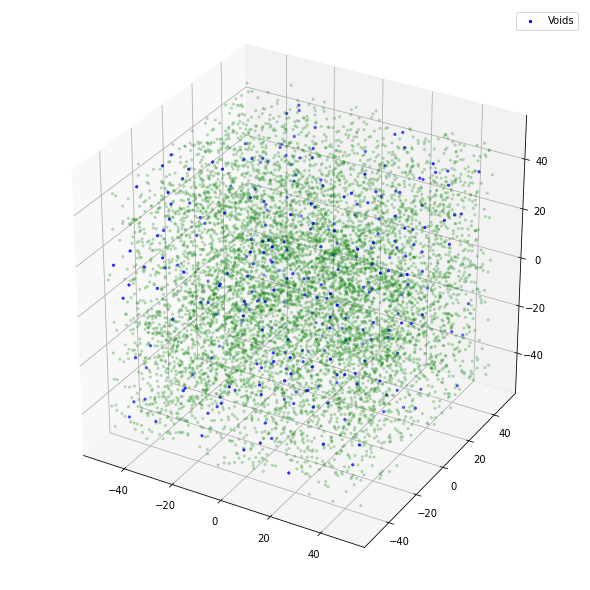

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(dat50[:,1], dat50[:,2], dat50[:,3],s=5,c='blue',label='Voids')
ax.scatter(cat50[:,0], cat50[:,1], cat50[:,2],s=5,c='green',alpha=0.2)

ax.legend(loc=0.0)

plt.savefig('cat50.png')

In [28]:
def datosGeo(Catalogo):
    a=Catalogo[:,6]
    b=Catalogo[:,7]
    c=Catalogo[:,8]
    def elip(a,b,c):
        return (1/4)*(a**2 - c**2)/(a**2 + b**2 + c**2)
    def elip1(a,c):
        return 1 - (c/a)
    def prol(a,b,c):
        return (1/4)*((b**2 - c**2)+ (b**2 - a**2))/(a**2 + b**2 + c**2)
    rt=[elip1(a,c),elip(a,b,c),prol(a,b,c)]
    
    return rt

In [29]:
geo50 = datosGeo(dat50)

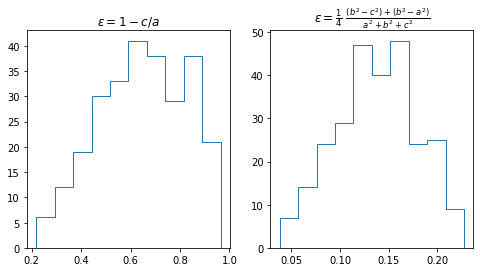

In [105]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title(r'$\epsilon = 1 - c/a$')
plt.hist(geo50[0],bins=10,histtype= 'step')
plt.subplot(122)
plt.title(r'$\epsilon = \frac{1}{4}$' +' ' +r'$\frac{(b^2 - c^2)+ (b^2 - a^2)}{a^2 + b^2 + c^2}$')
plt.hist(geo50[1],bins=10,histtype= 'step')

plt.savefig('hist_50.png')

(-0.3, 0.3)

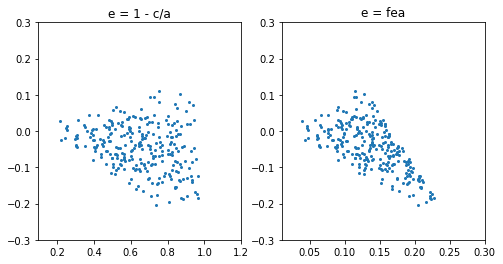

In [32]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('e = 1 - c/a')
plt.scatter(geo50[0],geo50[2],s=4)
plt.xlim(0.1,1.2)
plt.ylim(-0.3,0.3)
plt.subplot(122)
plt.title('e = fea')
plt.scatter(geo50[1],geo50[2],s=4)
plt.xlim(0.01,0.3)
plt.ylim(-0.3,0.3)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


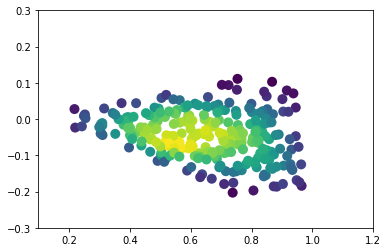

In [38]:
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([geo50[0],geo50[2]])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(geo50[0],geo50[2], c=z, s=100, edgecolor='')
plt.xlim(0.1,1.2)
plt.ylim(-0.3,0.3)
plt.show()

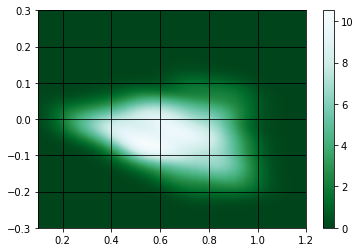

In [77]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = geo50[0]
y = geo50[2]

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[0.1:1.2:nbins*1j, -0.3:0.3:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r, shading='gouraud',hatch='.')
plt.grid(color='black')
plt.xlim(0.1,1.2)
plt.ylim(-0.3,0.3)
plt.colorbar()
plt.show()

In [92]:
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, titulo, xmin, xmax, ax = None, sort = True, bins = 5, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
    
    ax.set_title(titulo)
    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(-0.3,0.3)

    return ax

<Figure size 576x288 with 0 Axes>

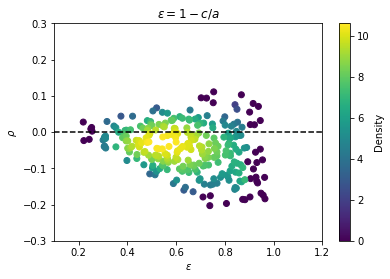

In [102]:
plt.figure(figsize=(8,4))
density_scatter( x, y , titulo=r'$\epsilon = 1 - c/a$',xmin=0.1,xmax=1.2)
plt.axhline(0,color='black',linestyle='--')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\rho$')
plt.savefig('elip_bonita_50.png')

<Figure size 576x288 with 0 Axes>

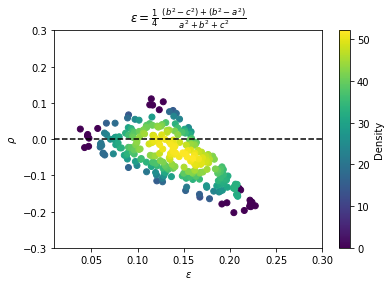

In [112]:
plt.figure(figsize=(8,4))
density_scatter( geo50[1], y , titulo=r'$\epsilon = \frac{1}{4}$' +' ' +r'$\frac{(b^2 - c^2)+ (b^2 - a^2)}{a^2 + b^2 + c^2}$',xmin=0.01,xmax=0.3)
plt.axhline(0,color='black',linestyle='--')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\rho$')
plt.savefig('elip_fea_50.png')

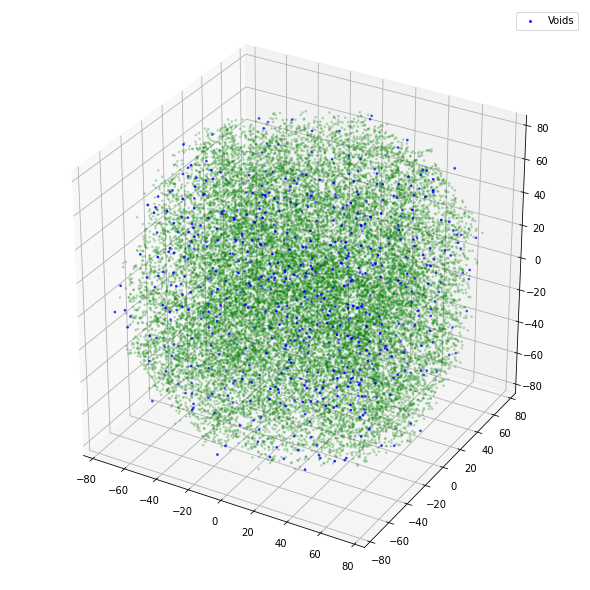

In [106]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(dat75[:,1], dat75[:,2], dat75[:,3],s=3,c='blue',label='Voids')
ax.scatter(cat75[:,0], cat75[:,1], cat75[:,2],s=3,c='green',alpha=0.2)

ax.legend(loc=0.0)

plt.savefig('cat75.png')

In [108]:
geo75 = datosGeo(dat75)

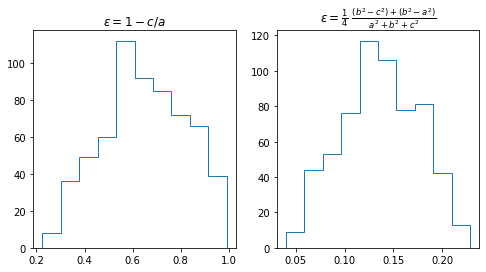

In [109]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title(r'$\epsilon = 1 - c/a$')
plt.hist(geo75[0],bins=10,histtype= 'step')
plt.subplot(122)
plt.title(r'$\epsilon = \frac{1}{4}$' +' ' +r'$\frac{(b^2 - c^2)+ (b^2 - a^2)}{a^2 + b^2 + c^2}$')
plt.hist(geo75[1],bins=10,histtype= 'step')

plt.savefig('hist_750.png')

<Figure size 576x288 with 0 Axes>

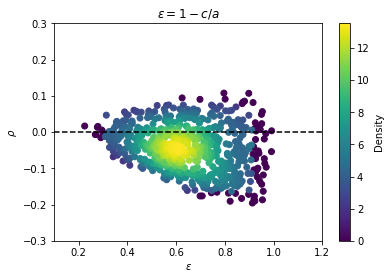

In [110]:
plt.figure(figsize=(8,4))
density_scatter( geo75[0], geo75[2] , titulo=r'$\epsilon = 1 - c/a$',xmin=0.1,xmax=1.2)
plt.axhline(0,color='black',linestyle='--')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\rho$')
plt.savefig('elip_bonita_75.png')

<Figure size 576x288 with 0 Axes>

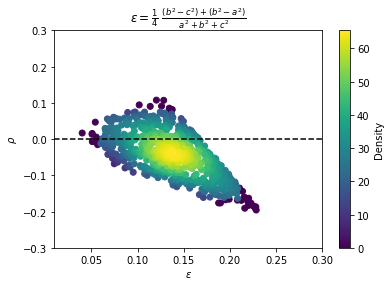

In [113]:
plt.figure(figsize=(8,4))
density_scatter( geo75[1], geo75[2], titulo=r'$\epsilon = \frac{1}{4}$' +' ' +r'$\frac{(b^2 - c^2)+ (b^2 - a^2)}{a^2 + b^2 + c^2}$',xmin=0.01,xmax=0.3)
plt.axhline(0,color='black',linestyle='--')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\rho$')
plt.savefig('elip_fea_75.png')